<a href="https://colab.research.google.com/github/granantuin/meteo_station_to-station_ml/blob/master/anal_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from numpy.random import rand
import numpy as np 

from sklearn.metrics import classification_report



In [0]:
! pip install pandas_ml

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
dfr = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/anal_estaciones/ria_winddata",sep='\t')

columns = cespon-wd  cespon-ws  coron-wd  coron-ws  cortegada-wd cortegada-ws  ribeiraboya-wd  ribeiraboya-ws  salvora-wd    salvora-ws


**wd=wind direction(degree)  ws=wind speed(m/s)**

In [4]:
dfr.describe()

,cespon-wd,cespon-ws,coron-wd,coron-ws,cortegada-wd,cortegada-ws,ribeiraboya-wd,ribeiraboya-ws,salvora-wd,salvora-ws
count,35637.000000,35637.000000,35637.000000,35637.000000,35637.000000,35637.000000,35637.000000,35637.000000,35637.000000,35637.000000
mean,162.192469,1.734209,139.322811,4.128855,133.628448,4.625053,154.888290,4.692062,179.516401,5.025900
std,122.727923,1.610038,100.757940,3.126367,94.564126,2.825926,108.127259,3.391970,118.014419,3.350696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.000000,35.000000,1.000000,49.000000,2.000000,47.000000,2.000000,52.000000,3.000000
50%,189.000000,1.000000,168.000000,4.000000,97.000000,4.000000,170.000000,4.000000,194.000000,4.000000
75%,241.000000,3.000000,216.000000,6.000000,213.000000,6.000000,242.000000,7.000000,292.000000,7.000000
max,360.000000,13.000000,360.000000,18.000000,360.000000,19.000000,360.000000,18.000000,360.000000,21.000000


** threshold more
2 m/s**

---



In [5]:
dfr = (dfr[pd.concat([dfr.loc[:,['cortegada-ws','ribeiraboya-ws', "cespon-ws", "coron-ws", "salvora-ws"]]>=2,dfr.loc[:,['cortegada-wd','ribeiraboya-wd', "cespon-wd", "coron-wd", "salvora-wd"]]!=360.0],axis=1)]).dropna()
dfr.describe()

,cespon-wd,cespon-ws,coron-wd,coron-ws,cortegada-wd,cortegada-ws,ribeiraboya-wd,ribeiraboya-ws,salvora-wd,salvora-ws
count,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000,13565.000000
mean,143.851898,3.259639,136.330851,6.642241,138.978916,6.539255,147.176705,7.352377,173.678806,6.962477
std,118.643522,1.350086,101.731654,2.473791,97.599891,2.554657,104.491734,2.826702,114.733470,3.475404
min,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000
25%,18.000000,2.000000,31.000000,5.000000,43.000000,5.000000,43.000000,5.000000,47.000000,4.000000
50%,194.000000,3.000000,183.000000,6.000000,184.000000,6.000000,171.000000,7.000000,195.000000,6.000000
75%,222.000000,4.000000,213.000000,8.000000,214.000000,8.000000,225.000000,9.000000,266.000000,9.000000
max,359.000000,13.000000,359.000000,18.000000,359.000000,19.000000,359.000000,18.000000,359.000000,21.000000


In [0]:
x_data=dfr.loc[:,['cortegada-wd','ribeiraboya-wd',"salvora-wd","cespon-wd"]].values
y_data=dfr['coron-wd'].values
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.4, random_state=5)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


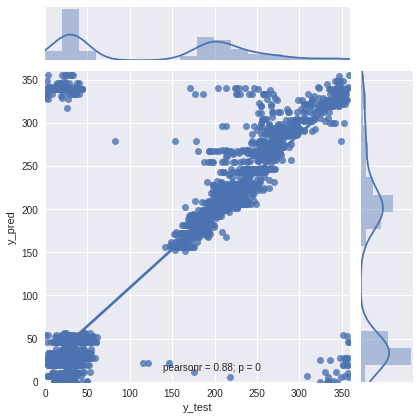

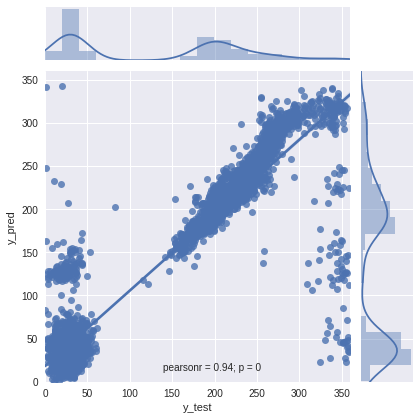

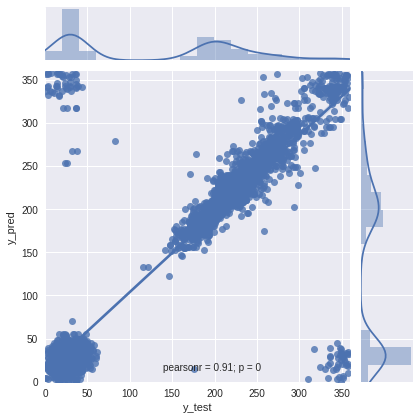

In [7]:

clas_list=[GaussianNB(),LinearRegression(),DecisionTreeClassifier(),]
for cl in clas_list:
  y_pred=cl.fit(x_train,y_train).predict(x_test) 
  df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
  sc=sns.jointplot(x="y_test",y="y_pred",data=df2,xlim=(0,360),ylim=(0,360), kind="reg")
  
  
  



count    5331.000000
mean        0.076158
std        11.963587
min      -161.000000
25%        -6.000000
50%         0.000000
75%         6.000000
max        95.000000
Name: difere, dtype: float64

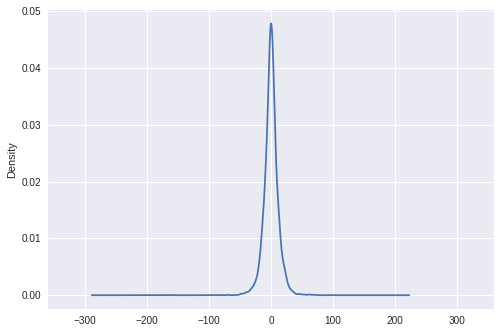

In [8]:
clas_list=[GaussianNB(),LinearRegression(),DecisionTreeClassifier()]

y_pred=clas_list[2].fit(x_train,y_train).predict(x_test) 
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
df2["difere"]=df2["y_pred"]-df2["y_test"]
df2["difere"]=df2["difere"][df2["difere"]<180]
df2["difere"]=df2["difere"][df2["difere"]>-180]
df2["difere"].plot(kind="kde",grid=True,xlim=(-360,360))
df2["difere"].describe()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


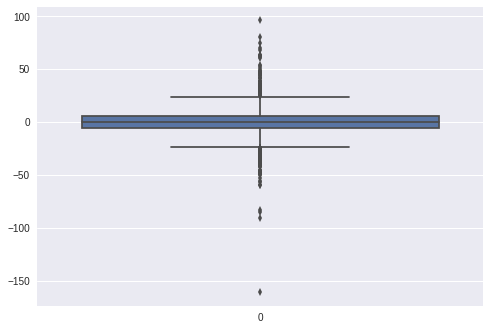

In [0]:
sns.boxplot(data=df2["difere"])